Data Dictionary used- http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

Question 1
1. Programmatically download and load into your favorite analytical tool the trip data for September 2015.
2. Report how many rows and columns of data you have loaded.

Downloading the data from the url containing the required csv file for September 2015 Green Taxis data using "pandas.read_table" which has "tab (\t)" as default delimiter . So used "comma (,)" as the separator for csv file.

In [1]:
#importing the pandas library for data analysis
import pandas as pd

#loading the data set
data=pd.read_table("https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv",sep=',')

In [2]:
#looking at the dimensions of the data set loaded
data.shape

(1494926, 21)

Inference-1494926 rows and 21 columns were loaded.

In [3]:
#displaying the column names
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [4]:
#making a copy of the data set
df=data

#checking the number of missing values in each column
print(data.isnull().sum())

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64


Inference-'Ehail_fee' column has all missing values. So we have to remove it.

In [5]:
#removing 'Ehail_fee' column from the data set
df.drop('Ehail_fee', axis=1, inplace=True)
#axis=1 refers to the column axis and inplace=True means that make the change in the original data set

#checking the columns in the data (checking whether 'Ehail_fee' is removed)
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type '],
      dtype='object')

Question 2
1. Plot a histogram of the number of the trip distance ("Trip Distance").
2. Report any structure you find and any hypotheses you have about that structure.

Plotting the histogram using the "matplotlib" library. I am also using the inline function to display the plot in the notebook itself inline with the code, so that we don't need the matplotlib.show() function to display the plot in a new window.

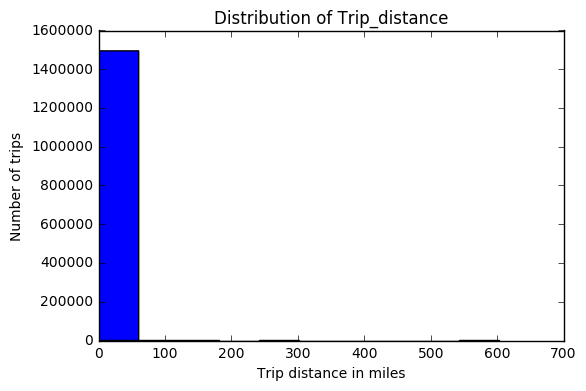

In [6]:
#importing matplotlib library 
import matplotlib.pyplot as plt
%matplotlib inline

#plotting the histogram of Trip_distance
plt.hist(df['Trip_distance']) #number of bins=10 and histtype='bar' - by default
plt.xlabel('Trip distance in miles') #x-axis label
plt.ylabel('Number of trips') #y-axis label
plt.title('Distribution of Trip_distance') #plot title

Inference-The structure obtained is highly right skewed (as evident from the histogram). There are only a handful of trips which covered a distance more than 60 miles. This can be explained by calculating the count of trips with distance greater than 60 miles.

In [7]:
#printing the number of trips greater than 60 miles and also the distances of these trips
print((df.loc[df.Trip_distance > 60,'Trip_distance']).count())
print((df.loc[df.Trip_distance > 60,'Trip_distance']))

37
63725       62.34
66118       69.50
82572       69.50
82587       69.50
172150      69.27
202704      89.15
213326      73.89
230596      60.64
295496      68.08
317951      66.09
375079      94.38
478080     246.28
485857      76.70
488361      76.70
516757     120.13
565057      76.03
768366      65.09
885097     100.74
898176      66.34
933777      98.51
944537     134.70
960955      77.70
1004188     64.90
1041503     61.15
1059850     62.18
1077032    105.65
1143126     67.60
1160937     61.21
1236955     71.11
1282594    108.62
1321961    603.10
1416994    112.60
1419485     90.92
1429046     89.80
1432559     69.80
1432692    112.60
1457965    108.50
Name: Trip_distance, dtype: float64


Inference-We can see that there are a few outliers due to which the distribution of Trip_distance is what we obtained. 
Also, it is quite evident that almost all the trips covered distance between 0 to 60 miles. Only a handful trips were long. If we remove these observations and then plot the histogram, I believe the distribution will be better than what we have obtained. 

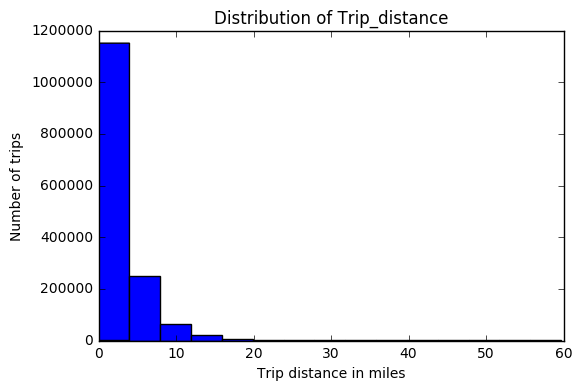

In [8]:
#subsetting the data with only the trips which have distance < 60 miles
df1=df[df.Trip_distance<60]

#plotting the histogram of Trip_distance again
plt.hist(df1['Trip_distance'],bins=15) #number of bins=15 
plt.xlabel('Trip distance in miles') #x-axis label
plt.ylabel('Number of trips') #y-axis label
plt.title('Distribution of Trip_distance') #plot title

Inference-The histogram obtained now more clearly shows the distribution of the trip distance. Still we can hardly observe any bars beyond 20 miles.

Further, I tried to subset the data with the trips having distance less than 20 miles.

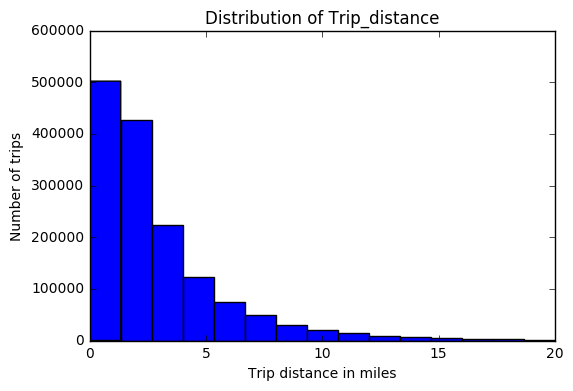

In [9]:
#subsetting the data with only the trips which have distance < 20 miles
df1=df[df.Trip_distance<20]

#plotting the histogram of Trip_distance again
plt.hist(df1['Trip_distance'],bins=15) #number of bins=15 
plt.xlabel('Trip distance in miles') #x-axis label
plt.ylabel('Number of trips') #y-axis label
plt.title('Distribution of Trip_distance') #plot title

Inference- The distribution was very highly right-skewed initially. Further, when I subsetted the data with trip_distance < 60 miles, the skewness decreased only a little bit. But, with the final subset of data (with trip_distance < 20 miles), the distribution was much better than the two cases before, but still it was right skewed.

For the next parts, I am moving forward with this subset of data (only with trip_distance < 20 miles).

In [10]:
##looking at the dimensions of the data set
df1.shape

(1491532, 20)

Question 3
1. Report mean and median trip distance grouped by hour of day.

I have considered the Pickup time from where the Hour value will be extracted.
For this, I will create a new column where the value of Hour extracted from the variable-lpep_pickup_datetime will be stored.
Then, I created groups based on the hour value and then calculated the mean and the median of the trip distance using NumPy functions.

In [11]:
#Creating a column "Hour"
df1['Hour']=pd.DatetimeIndex(df1['lpep_pickup_datetime']).hour

#importing NumPy library 
import numpy as np

#Grouping the data based on the hour value and calculating mean and median
df1.groupby(['Hour']).Trip_distance.agg([np.mean, np.median])

C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,mean,median
Hour,,
0,3.074820,2.20
1,2.978560,2.12
2,2.997813,2.14
3,3.134582,2.20
4,3.438384,2.34
5,4.034607,2.88
6,3.927335,2.82
7,3.222625,2.16
8,2.994085,1.97


Question 3
2.  We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

To calculate the distance between any airport and the pickup or dropoff location, I chose the LaGuardia Airport with the (Latitude,Longitude) = (40.7747222222,-73.8719444444).

I tried calculating the exact distance using the Haversine formula using the math library, but it was taking a lot of time. So, I calculated the distance using NumPy, which uses vectorization, that results in faster calculation.

The function for haversine using math library is as follows:

import math
def haversine(lat1, lon1, lat2, lon2):
    radius = 3959                        #radius of Earth in miles=3959

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1))* math.cos(math.radians(lat2)) * math.sin\            (dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [12]:
#creating a function to calculate the distance using NumPy
def haversine_np(lat1,lon1):
    
    lat2=40.7747222222
    lon2=-73.8719444444
    lat1, lon1 = map(np.radians, [lat1, lon1])
    lat2, lon2 = map(np.radians, [lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    d = 3959 * c
    return d

In [13]:
#calculating distance between the LaGuardia airport and the dropoff location
df1['Dropoff_distance'] = haversine_np(df['Dropoff_latitude'],df['Dropoff_longitude'])
df1['Dropoff_distance']

C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0           8.372211
1          11.955013
2           2.328091
3           3.120131
4           5.619267
5           4.704421
6           1.298932
7           4.006468
8           7.880147
9           1.752920
10          5.045947
11          1.288453
12          5.443978
13          6.425545
14          4.483764
15          8.831912
16         10.806292
17          7.236671
18          5.048121
19          3.767036
20          7.735687
21          1.214168
22          7.137323
23          7.307780
24          4.327010
25          1.782817
26          0.052609
27          2.844804
28          4.729465
29          6.595297
             ...    
1494896    10.155501
1494897     3.564189
1494898     7.067779
1494899     5.861752
1494900     6.245522
1494901     5.143011
1494902     8.978497
1494903    14.341810
1494904    10.490836
1494905    13.480310
1494906     6.779575
1494907     2.215382
1494908     2.125005
1494909     8.211115
1494910     5.765411
1494911     3.216549
1494912     3

In [14]:
#calculating distance between the LaGuardia airport and the pickup location
df1['Pickup_distance'] = haversine_np(df['Pickup_latitude'],df['Pickup_longitude'])
df1['Pickup_distance']

C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0           8.377410
1          11.955706
2           2.647058
3           2.646330
4           6.058276
5           4.480122
6           2.191971
7           4.211292
8           7.351684
9           2.366170
10          4.751804
11          1.764528
12          4.728618
13          6.496463
14          4.827388
15          7.378676
16         11.794346
17          7.715051
18          3.693204
19          4.476931
20          7.817133
21          2.099408
22          6.311372
23          6.375366
24          3.953409
25          2.167124
26          1.964409
27          2.851526
28          4.831435
29          5.933797
             ...    
1494896     8.202674
1494897     3.946384
1494898     4.798895
1494899     4.899603
1494900     1.265618
1494901     4.570197
1494902     9.386904
1494903    13.641242
1494904     9.058219
1494905    13.321532
1494906     6.808187
1494907     2.182355
1494908     5.464526
1494909     7.691372
1494910     8.175285
1494911     2.587870
1494912     4

In [15]:
df1.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
Hour                       int32
Dropoff_distance         float64
Pickup_distance          float64
dtype: object

To check whether the trip originated or terminated at the LaGuardia Airport, I assumed a threshold of 0.1 miles, i.e if the pickup distance or dropoff distance is less than 0.1 miles, then the trip originated or terminated at the airport (assuming the size of an average airport).

In order to select only such trips, I made a subset of the data which such condition.

In [16]:
#Creating a new data frame satisfying the condition
df_airport=df1[(df1.Pickup_distance < 0.1) | (df1.Dropoff_distance < 0.1)]

In [17]:
#Looking at the dimensions of this data frame
df_airport.shape

(10071, 23)

Inference- 10071 trips either originated from or terminated at the LaGuardia Airport during September 2015. This number is very small as compared to the total number of trips. 
Next, I found the average total fare for these trips, i.e. the Total amount charged to the customers.

In [18]:
df_airport.Total_amount.mean()

26.039665375829326

Inference-The average total fare for the trips to or from the airport was about $26. 

Now, I found some interesting characterstics about these trips. I calculated, separately, the number of trips that originated and those which terminated at the airport.

In [19]:
#Finding the number of trips that originated from the LaGuardia airport.
df_airport_p=df1[(df1.Pickup_distance < 0.1)]
print(df_airport_p.shape)

#Finding the number of trips that terminated at the LaGuardia airport.
df_airport_d=df1[(df1.Dropoff_distance < 0.1)]
print(df_airport_d.shape)

(100, 23)
(10049, 23)


Inference- Only 100 trips started from the airport and around 10,000 ended at the airport. This can be attributed to the fact that customers tend to prefer taking other means of transportation rather than taking the green taxi, when it comes to leaving the airport.

By looking at the numbers separately, the total number of trips come out to be 100+10049=10149. But the overall picture was different, 10071. There is a difference of 10149-10071=78. These 78 trips were those where both the pickup and dropoff distance from the airport was less than 0.1 miles.
This number is found below.
Since, I assumed the threshold to be 0.1 miles, and the actual geographical spread of the airport would definitely differ from this, there is such descrepancy.

In [20]:
df_airport_b=df1[(df1.Pickup_distance < 0.1) & (df1.Dropoff_distance < 0.1)]
df_airport_b.shape

(78, 23)

Further, I tried to find the number of trips based on the time of the day when these trips to and from the airport were made by grouping the data based on the hour value of both pickup and dropoff time.

In [21]:
#Creating a column "Hour" based on the pickup time
df_airport_p['Hour']=pd.DatetimeIndex(df_airport_p['lpep_pickup_datetime']).hour

#Grouping the data based on the hour value of pickup time and calculating the number of trips
print(df_airport_p.groupby(['Hour']).size())

Hour
0      2
1      1
3      4
4      4
5      9
6     11
7     11
8      5
9      4
10     6
11     5
12     2
13     4
14     7
15     8
16     5
17     2
18     2
19     2
20     4
21     2
dtype: int64


C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Inference-There were only 2 hours (6 & 7) where the maximum number of trips were made when compared to the other hours.

In [22]:
#Creating a column "Hour" based on the dropoff time
#df_airport_d['Hour']=pd.DatetimeIndex(df_airport_d['lpep_pickup_datetime']).hour

#Grouping the data based on the hour value of dropoff time and calculating the number of trips
print(df_airport_d.groupby(['Hour']).size())

Hour
0       7
1      12
2      18
3     173
4     467
5     502
6     566
7     618
8     678
9     634
10    635
11    564
12    593
13    567
14    691
15    741
16    726
17    635
18    600
19    310
20    140
21     95
22     44
23     33
dtype: int64


Inference-The majority of these trips were made from 4 in the morning to 7 in the evening. During the night hours, the number of trips drop down significantly. It can be assumed that the customers prefer taking other transportation facility at night over the green taxis due to safety reasons, i.e. they are not comfortable traveling with green taxis at night.

Question 4
1. Build a derived variable for tip as a percentage of the total fare.

For this, I have used the following calculation- (Tip_amount/Total_amount)*100 and stored the values in a new variable named Tip_percent.
But before creating, since the tip details are not present for cash payments, it is better to remove the trips which involved cash payment. So, I subsetted the dataframe satisfying this condition.
Also, I checked the values in the Tip_amount and found some negative values. So I removed the trips with negative tip amounts as tips can't be negative. For this, I didn't consider the trips with cash payment.

In [23]:
#Checking the summary statistics of Tip_amount
df1[df1.Payment_type.isin([1,4,5,6])].Tip_amount.describe()

count    703853.000000
mean          2.589965
std           2.866505
min         -50.000000
25%           1.160000
50%           2.000000
75%           3.350000
max         300.000000
Name: Tip_amount, dtype: float64

In [24]:
#Removing the trips with negative tip amount
df1=df1[df1.Tip_amount>=0]

#Looking at the dimensions of this data set
df1.shape

(1491494, 23)

Since, the data doesn't contain information about the tip for trips with cash payment, I have removed such trips from the data.

In [25]:
#Removing the trips with cash payment, i.e. Payment type=2
df1=df1[df1.Payment_type!=2]

#Looking at the dimensions of this data set
df1.shape

(709280, 23)

Now, analyzing the trips with other payment types-3,4,5,6 and deciding whether to remover them or keep them.

In [26]:
#Payment type=3-No Charge
df1[df1.Payment_type==3].Tip_amount.describe()

count    5430.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Tip_amount, dtype: float64

Inference-Payment type=3 has all zero values.

In [27]:
#Payment type=4-Dispute
df1[df1.Payment_type==4].Tip_amount.describe()

count    4352.000000
mean        0.000908
std         0.059876
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.950000
Name: Tip_amount, dtype: float64

Inference-Payment type=4 has no anomalies. So, I will retain these trips.

In [28]:
#Payment type=5-Unknown
df1[df1.Payment_type==5].Tip_amount.describe()

count    72.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Tip_amount, dtype: float64

Inference-Payment type=5 has all zero values. So, I will remove these trips, assuming them to be cash payment as it is unknown.

In [29]:
#Payment type=6-Voided trip
df1[df1.Payment_type==6].Tip_amount.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Tip_amount, dtype: float64

Inference-There is no such trip. So, nothing needs to be done.

In [30]:
#Removing the trips with Payment type=5
df1=df1[df1.Payment_type!=5]

#Looking at the dimensions of this data set
df1.shape

(709208, 23)

Now looking for anomalies in data for Payment type=1, i.e. Credit card

In [31]:
#Payment type=1-Credit Card
df1[df1.Payment_type==1].Tip_amount.describe()

count    699426.000000
mean          2.606427
std           2.867434
min           0.000000
25%           1.160000
50%           2.000000
75%           3.360000
max         300.000000
Name: Tip_amount, dtype: float64

Inference-We can see a maximum tip amount of 300. This seemed to be an issue with the data. So I analyzed the same.

In [32]:
#Looking at the trips with tip amount > $50
df1.loc[df1.Tip_amount>50,['Tip_amount','Trip_distance','Total_amount']]

,Tip_amount,Trip_distance,Total_amount
3412,78.00,0.00,81.80
16195,80.00,0.00,480.00
16243,80.00,0.00,480.00
23938,65.00,6.00,92.80
32335,100.00,0.70,104.30
39274,75.00,1.70,78.80
43922,70.00,0.00,73.80
44566,55.55,0.00,59.35
56209,60.00,4.50,63.30
60960,80.00,1.47,93.30


Inference- As we can see that the tip amount in almost all such trips is outrageous. This might be a mistake from the passenger or some other reason. 
I think that such tip amounts will not help in making a correct predictive model. So, it is better to remove them.

In [33]:
#Removing trips with tip amount > 50
df1=df1[df1.Tip_amount <= 50]

#Looking at the dimensions of this data set
df1.shape

(709000, 23)

Now, I created a new column with values equal to the tip percentage

In [34]:
#Creating Tip_percent column
df1['Tip_percent']=(df1['Tip_amount']/df1['Total_amount'])*100

#Looking at the summary statistics of Tip_percent
df1['Tip_percent'].describe()

C:\Users\sethi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    708418.000000
mean         13.941980
std           7.860491
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max         100.000000
Name: Tip_percent, dtype: float64

Inference-As we can see NaN values in the quantiles, this can be due to the fact that the total amount for such trips would be zero. So, I checked for such trips.

In [35]:
df1[df1.Total_amount==0].Total_amount.count()

582

Inference-There are 582 trips with total amount=0. So, we need to remove such trips as well.

In [36]:
#Removing trips with Total_amount=0
df1=df1[df1.Total_amount > 0]

#Looking at the dimensions of this data set
df1.shape

(706244, 24)

Inference-So now we have only those rows which have total amount>0. The above code removed rows which had negative Total amount.

In [37]:
#Creating Tip_percent column
df1['Tip_percent']=(df1['Tip_amount']/df1['Total_amount'])*100

#Looking at the summary statistics of Tip_percent
df1['Tip_percent'].describe()

count    706244.000000
mean         13.984897
std           7.834368
min           0.000000
25%          10.510511
50%          16.666667
75%          16.666667
max         100.000000
Name: Tip_percent, dtype: float64

Inference-Now we have the newly created column-Tip_percent with valid values.
As we can see, there are tip percentage values =100, i.e. the tips were only paid as the total amount. I think these trips can be removed as well.
But for the time, I have not removed them.

Question 4
2. Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

To build a predictive model, we first need to do the data exploratory analysis.
As we saw before, there are 4 missing values in the variable-Trip_type. So, I imputed the missing values by the most frequent value for that variable.

In [38]:
#Converting Trip_type variable to categorical type
df1['Trip_type ']=df1['Trip_type '].astype('category')

#Checking the frequency count of the values of Trip_type variable
df1['Trip_type '].describe()

count     706240.0
unique         2.0
top            1.0
freq      694894.0
Name: Trip_type , dtype: float64

Inference-
count     706240.0
unique         2.0
top            1.0
freq      694894.0

Most Frequent value=1.
So filling the 4 missing values with 1

In [39]:
#Imputing it with the most frequent value, i.e. 1
df1['Trip_type '].fillna(value=1,inplace=True)

#Checking for missing values in the data set
df1.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
Hour                     0
Dropoff_distance         0
Pickup_distance          0
Tip_percent              0
dtype: int64

Inference-There are no missing values in the data now.

In order to calculate the trip duration, I will create another column (Trip_duration), which is the difference between the dropoff time and the pickup time. For this, we need to first convert the columns "lpep_pickup_datetime" and "Lpep_dropoff_datetime" to datetime type.

In [40]:
#"lpep_pickup_datetime" and "Lpep_dropoff_datetime" have indexes 1 and 2 respectively
df1.iloc[:,1:3] = df1.iloc[:,1:3].apply(pd.to_datetime, errors='coerce')
#Passing errors='coerce' to convert invalid data to NaT (not a time)

#Creating the "Trip_duration" column
df1['Trip_duration']=df1['Lpep_dropoff_datetime']-df1['lpep_pickup_datetime']

Since the Trip_duration column contained both the date and time, I only calculated the total seconds in the trip duration.

In [41]:
#Converting the duration equal to total seconds
df1['Trip_duration']=df1['Trip_duration'].astype('timedelta64[s]')

#Looking at the summary statistics of the Trip_duration column
df1['Trip_duration'].describe()

count    706244.000000
mean       1249.059876
std        5451.465792
min           0.000000
25%         422.000000
50%         716.000000
75%        1164.000000
max       86393.000000
Name: Trip_duration, dtype: float64

As we can see that there are trips with duration=0 seconds. We can remove such trips, as trips must be of some duration.

In [42]:
#Removing trips with zero duration
df1=df1[df1.Trip_duration>0]

#Looking at the shape of the data
df1.shape

(706076, 25)

Looking at the RateCodeID column. Since it has categories, we will first convert it into categorical type.

In [43]:
#Converting into categorical type
df1['RateCodeID']=df1.RateCodeID.astype('category')

Inference- Found RateCodeID=99 for some observations, which is not present in the data dictionary. So I removed them.
According to the data dictionary, only 1,2,3,4,5,6 are valid IDs. 

In [44]:
#Removing rows where the RateCodeID=99
df1=df1[(df1.RateCodeID!=99)]

#Looking at the shape of the data
df1.shape

(706072, 25)

To remove variables irrelevant based on my intuition, I decided to remove the following variables after careful analysis of them using the data dictionary, located at http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf, and also those variables which I created for the different calculations :
1. VendorID
2. Dropoff_longitude
3. Dropoff_latitude
4. Pickup_longitude
5. Pickup_latitude
6. Dropoff_distance
7. Pickup_distance
8. Hour
9. lpep_pickup_datetime
10. Lpep_dropoff_datetime
11. Store_and_fwd_flag

In [45]:
#Dropping the irrelevant variables
df5=df1.drop(['VendorID','Dropoff_longitude','Dropoff_latitude','Pickup_longitude','Pickup_latitude'\
            ,'Dropoff_distance','Pickup_distance','Hour','lpep_pickup_datetime','Lpep_dropoff_datetime'\
            ,'Store_and_fwd_flag'],axis=1)

#Looking at the columns of the transformed data
df5.columns

Index(['RateCodeID', 'Passenger_count', 'Trip_distance', 'Fare_amount',
       'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount',
       'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type ',
       'Tip_percent', 'Trip_duration'],
      dtype='object')

Creating dummy variables for the variables with categorical values:
1. RateCodeID
2. Payment_type
3. Trip_type 

In [46]:
#Creating dummy variables by dropping the first value, i.e. keeping the first value as reference
df5=pd.get_dummies(df5,columns=['RateCodeID','Payment_type','Trip_type '],drop_first=True)

#Looking at the columns and their data types
df5.dtypes

Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Tip_percent              float64
Trip_duration            float64
RateCodeID_2             float64
RateCodeID_3             float64
RateCodeID_4             float64
RateCodeID_5             float64
RateCodeID_6             float64
RateCodeID_99            float64
Payment_type_3           float64
Payment_type_4           float64
Trip_type _2.0           float64
dtype: object

Even after removing the RateCodeID=99, it is still getting created as a dummy variable. But when we find the sum of this variable, it is zero.
So we can remove the column in the new data set.

In [47]:
#Sum of RateCodeID_99 variable
df5.RateCodeID_99.sum()

0.0

Inference- Since the sum is 0, we can remove this variable.

In [48]:
#Removing RateCodeID_99 column
df5.drop('RateCodeID_99',axis=1,inplace=True)

#Checking the columns
df5.dtypes

Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Tip_percent              float64
Trip_duration            float64
RateCodeID_2             float64
RateCodeID_3             float64
RateCodeID_4             float64
RateCodeID_5             float64
RateCodeID_6             float64
Payment_type_3           float64
Payment_type_4           float64
Trip_type _2.0           float64
dtype: object

Since all the variables are now numeric, we will find the correlation between each pair of variables.

In [49]:
#Creating a dataframe with pair wise correlation values
df5.corr()

,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Tip_percent,Trip_duration,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,Payment_type_3,Payment_type_4,Trip_type _2.0
Passenger_count,1.000000,0.012744,0.011221,0.020069,0.009739,0.016183,0.008365,0.009959,0.014249,0.014129,0.004480,-0.003273,-0.001728,0.001978,-0.009950,-0.000088,-0.016052,-0.019489,-0.009489
Trip_distance,0.012744,1.000000,0.867618,-0.053628,0.045591,0.571415,0.295645,0.052636,0.874731,-0.038264,0.093479,0.198225,0.042189,0.059809,-0.053994,-0.001013,-0.028881,-0.023121,-0.053603
Fare_amount,0.011221,0.867618,1.000000,-0.085954,-0.154616,0.564549,0.259928,-0.139940,0.979172,-0.070664,0.099187,0.180614,0.072926,0.068730,0.145466,-0.003299,-0.026968,-0.020838,0.142824
Extra,0.020069,-0.053628,-0.085954,1.000000,0.124052,-0.025372,-0.042727,0.122933,-0.049744,0.013119,-0.005243,-0.046657,-0.002990,-0.000084,-0.126522,-0.002870,0.000542,-0.006465,-0.124703
MTA_tax,0.009739,0.045591,-0.154616,0.124052,1.000000,0.000523,-0.021914,0.955822,-0.119866,0.103812,0.003885,0.006159,-0.178307,-0.000898,-0.971357,0.000379,-0.020191,-0.004112,-0.976507
Tip_amount,0.016183,0.571415,0.564549,-0.025372,0.000523,1.000000,0.236343,0.007534,0.703878,0.614762,0.042256,0.131015,0.042746,0.041157,-0.007989,-0.003024,-0.077348,-0.072551,-0.008034
Tolls_amount,0.008365,0.295645,0.259928,-0.042727,-0.021914,0.236343,1.000000,-0.001456,0.352685,-0.003656,0.023262,0.194187,0.112639,0.048959,0.001111,-0.000478,-0.007207,0.000318,0.001435
improvement_surcharge,0.009959,0.052636,-0.139940,0.122933,0.955822,0.007534,-0.001456,1.000000,-0.104408,0.098873,0.004968,0.005410,0.002992,-0.000943,-0.962159,-0.003450,-0.011429,0.000866,-0.977429
Total_amount,0.014249,0.874731,0.979172,-0.049744,-0.119866,0.703878,0.352685,-0.104408,1.000000,0.069472,0.094307,0.194854,0.079005,0.070713,0.108871,-0.003549,-0.039602,-0.032877,0.106641
Tip_percent,0.014129,-0.038264,-0.070664,0.013119,0.103812,0.614762,-0.003656,0.098873,0.069472,1.000000,-0.041180,-0.003045,-0.015978,-0.006106,-0.103385,-0.005205,-0.133156,-0.124911,-0.101424


In [50]:
#Looking for highly correlated variables
df5.corr()>0.9

,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Tip_percent,Trip_duration,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,Payment_type_3,Payment_type_4,Trip_type _2.0
Passenger_count,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Trip_distance,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Fare_amount,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Extra,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MTA_tax,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Tip_amount,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Tolls_amount,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
improvement_surcharge,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Total_amount,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Tip_percent,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Inference-On observing the above 2 tables, I found that 'MTA_tax','improvement_surcharge','RateCodeID_5' and 'Trip_type_2.0' are highly correlated (Multi-collinearity). So, any 3 of them can be removed. I have decided to retain Trip_type_2.0 as Trip_type=1 depends on its value.

In [51]:
#Removing the variables with high correlated variables
df5.drop(['improvement_surcharge','RateCodeID_5','MTA_tax'], axis=1, inplace=True)

#Looking at the columns
df5.dtypes

Passenger_count      int64
Trip_distance      float64
Fare_amount        float64
Extra              float64
Tip_amount         float64
Tolls_amount       float64
Total_amount       float64
Tip_percent        float64
Trip_duration      float64
RateCodeID_2       float64
RateCodeID_3       float64
RateCodeID_4       float64
RateCodeID_6       float64
Payment_type_3     float64
Payment_type_4     float64
Trip_type _2.0     float64
dtype: object

Now, I will create a predictive model based on these varaibles to predict the tip as a percentage of the total fare.
For this, I will first store the target variable, which is the Tip_percent and then remove from the data.

Also, I will import the scikit learn library to build the predictive model.
LinearRegression for the linear regression model
train_test_split for splitting the train and test data
cross_val_score for calculating the cv score on train data
cross_val_predict for the test data
metrics for calculating the metrics like R-squared, MAE (Mean Absolute Error), MSE (Mean Squared Error)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

#setting random seed for reproducibility
np.random.seed(123)

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
#Creating the target variable as numpy array
y=np.array(df5['Tip_percent'])

#Displaying the type
type(y)

numpy.ndarray

In [54]:
#Dropping the target variable from the data
df5.drop('Tip_percent',axis=1,inplace=True)

#Creating the data as numpy array
X=np.array(df5)

#Displaying the type
type(X)

numpy.ndarray

In [55]:
#Printing the shape of the arrays
print(X.shape)
print(y.shape)

(706072, 15)
(706072,)


Splitting the data into train and test using 30% for test set

In [56]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Displaying the shapes of the train and test splits
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(494250, 15) (494250,)
(211822, 15) (211822,)


Creating a linear regression model using scikit learn.linear_model library.

In [57]:
#Creating a linear regession model
linreg1=LinearRegression()

#obtaining the 10-fold cross validation (cv=10) scores on the training data
scores1=cross_val_score(linreg1,X_train,y_train,cv=10)

#Printing the R-squared values 
print(scores1)
print(np.mean(scores1))
print(np.std(scores1))

[ 0.65816293  0.67678934  0.66965192  0.66328452  0.65341537  0.66907799
  0.65799127  0.65589896  0.66612411  0.66629594]
0.663669234112
0.00691618345219


Result-
R-squared values- 0.65816293  0.67678934  0.66965192  0.66328452  0.65341537  0.66907799 0.65799127  0.65589896     0.66612411  0.66629594

mean of R-squared values-0.663669234112

standard deviation of R-squared values-0.00691618345219

In [58]:
#making predictions on the test set
predictions1 = cross_val_predict(linreg1, X_test, y_test, cv = 10)

#Checking the R-squared value, Mean Absolute Error and Root Mean Squared Value for the test set
R_sq = metrics.r2_score(y_test, predictions1)
print(R_sq)
MAE = metrics.mean_absolute_error(y_test, predictions1)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions1))
print(RMSE)

0.663236159558
2.9130013632
4.54843594081


Result-
R-squared=0.663236159558

MAE=2.9130013632

RMSE=4.54843594081

Assuming it to be a model with good R-Squared value, we now try to fit the model on the Training data and then predicting the values for the test data.

In [59]:
#Fitting the model
linreg1.fit(X_train, y_train)

#predicting the values
y_pred1= linreg1.predict(X_test)

#scoring the model
linreg1.score(X_test, y_test)

0.66362638979822575

Result-
Obtained R-squared=0.66362638979822575 with linear regression.

Now, creating a Random Forest Regressor model using the ensemble library of scikit learn. For this we first import the library.

In [60]:
#Importing the required library
from sklearn.ensemble import RandomForestRegressor

#Defining the model with default parameters-number of trees=10 and criterion of measurement='mse' (Mean Square Error)
rfreg1=RandomForestRegressor()

#obtaining the 10-fold cross validation scores on the training data
scores1=cross_val_score(rfreg1,X_train,y_train,cv=10)

#Printing the R-squared values 
print(scores1)
print(np.mean(scores1))
print(np.std(scores1))

[ 0.99775512  0.99986246  0.99980575  0.99983259  0.99977515  0.99982691
  0.99966471  0.99912715  0.99961268  0.99882599]
0.999408851128
0.000641304631167


Result-
R-squared values- 0.99775512  0.99986246  0.99980575  0.99983259  0.99977515  0.99982691  0.99966471  0.99912715  0.99961268  0.99882599

mean of R-squared values-0.999408851128

standard deviation of R-squared values-0.000641304631167

In [61]:
#making predictions on the test set
predictions1 = cross_val_predict(rfreg1, X_test, y_test, cv = 10)

#Checking the R-squared value, Mean Absolute Error and Root Mean Squared Value for the test set
R_sq = metrics.r2_score(y_test, predictions1)
print(R_sq)
MAE = metrics.mean_absolute_error(y_test, predictions1)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions1))
print(RMSE)

0.998624768772
0.0160068419939
0.290661304644


Result-
R-squared=0.998624768772

MAE=0.0160068419939

RMSE=0.290661304644

In [62]:
#Fitting the model
rfreg1.fit(X_train, y_train)

#predicting the values
y_pred= rfreg1.predict(X_test)

#scoring the model (R-squared value)
rfreg1.score(X_test, y_test)

0.9995954595079477

Result-
Obtained R-squared value=0.9995954595079477 for Random Forest model

Though, we are getting very high R-squared values for both train and test data, we might not call it overfitting. But for the sake of trying out different approach, I will now remove the Tip_amount variable from the data and then again try building the models. I am assuming that it might be causing the very high value of R-squared.

In [63]:
#Dropping the Tip_amount variable from the data
df6=df5.drop('Tip_amount',axis=1)

#Creating the data as numpy array
X1=np.array(df6)

Splitting the new data into train and test split with 70:30 ratio

In [64]:
#Splitting the data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3)

#Displaying the shapes of the train and test splits
print(X1_train.shape, y_train.shape)
print(X1_test.shape, y_test.shape) 

(494250, 14) (494250,)
(211822, 14) (211822,)


Creating Linear Regression Model without Tip_amount variable

In [65]:
#Creating a linear regession model
linreg2=LinearRegression()

#obtaining the 10-fold cross validation (cv=10) scores on the training data
scores2=cross_val_score(linreg2,X1_train,y_train,cv=10)

#Printing the R-squared values 
print(scores2)
print(np.mean(scores2))
print(np.std(scores2))

[ 0.65654611  0.66702235  0.66863651  0.65896902  0.66137885  0.64492685
  0.66067036  0.66763038  0.67719907  0.67115996]
0.663413945552
0.00853504789681


Result-
R-squared values- 0.65654611  0.66702235  0.66863651  0.65896902  0.66137885  0.64492685  0.66067036  0.66763038  0.67719907  0.67115996

mean of R-squared values-0.663413945552

standard deviation of R-squared values-0.00853504789681

In [66]:
#making predictions on the test set
predictions2 = cross_val_predict(linreg2, X_test, y_test, cv = 10)

#Checking the R-squared value, Mean Absolute Error and Root Mean Squared Value for the test set
R_sq = metrics.r2_score(y_test, predictions2)
print(R_sq)
MAE = metrics.mean_absolute_error(y_test, predictions2)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions2))
print(RMSE)

-4.0472048902e-05
5.73860307147
7.85964724897


Result-
R-squared=-4.0472048902e-05

MAE=5.73860307147

RMSE=7.85964724897

In [67]:
#Fitting the model
linreg2.fit(X1_train, y_train)

#predicting the values
y_pred2= linreg2.predict(X1_test)

#scoring the model
linreg2.score(X1_test, y_test)

0.66423427433148619

Result-
Obtained R-squared=0.66423427433148619 with linear regression.

Creating Random Forest model without Tip_amount variable

In [68]:
rfreg2=RandomForestRegressor()

scores2=cross_val_score(rfreg2,X1_train,y_train,cv=10)

#Printing the R-squared values 
print(scores2)
print(np.mean(scores2))
print(np.std(scores2))

[ 0.99636347  0.9972545   0.99402358  0.99703832  0.99507174  0.99504277
  0.99707603  0.99585154  0.99521681  0.99787322]
0.996081198181
0.00117066254969


Result-
R-squared values- 0.99636347  0.9972545   0.99402358  0.99703832  0.99507174  0.99504277  0.99707603  0.99585154  0.99521681  0.99787322

mean of R-squared values-0.996081198181

standard deviation of R-squared values-0.00117066254969

In [69]:
#making predictions on the test set
predictions2 = cross_val_predict(rfreg2, X1_test, y_test, cv = 10)

#Checking the R-squared value, Mean Absolute Error and Root Mean Squared Value for the test set
R_sq = metrics.r2_score(y_test, predictions2)
print(R_sq)
MAE = metrics.mean_absolute_error(y_test, predictions2)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions2))
print(RMSE)

0.991685105619
0.0780175436049
0.716675627026


Result-
R-squared=0.991685105619

MAE=0.0780175436049

RMSE=0.716675627026

In [70]:
#Fitting the model
rfreg2.fit(X1_train, y_train)

#predicting the values
y_pred= rfreg2.predict(X1_test)

#scoring the model (R-squared value)
rfreg2.score(X1_test, y_test)

0.99528990020885022

Obtained R-squared=0.99528990020885022 with linear regression.

Inference- My assumption about the 'Tip_amount' variable proved to be wrong. The Random forest model is predicting the tip percentage very accurately.

I tried changing the parameter values (like n_estimators, criterion, etc.) of the Random Forest model but it is taking a lot more time than the defualt parameters. So, for this time, I haven't performed that. But if I had more time I would have definitely gone for that. This is due to the fact that ensemble methods like Random Forests and Boosting generally perform much better than other algorithms.

I also made SVM regressor model and yet again time was the issue. It was even taking more time than Random Forest model.
The code for building the SVM regression model I tried is as follows:

from sklearn.svm import SVR

#defining the model
svm_reg=SVR() #using default parameters

#calculating the 10-fold cross validation scores
scores=cross_val_score(svm_reg,X_train,y_train,cv=10)

#Printing the R-squared values 
print(scores)
print(np.mean(scores))
print(np.std(scores))

#making predictions on the test set
predictions = cross_val_predict(svm_reg, X_test, y_test, cv = 10)

#Checking the R-squared value, Mean Absolute Error and Root Mean Squared Value for the test set
R_sq = metrics.r2_score(y_test, predictions)
print(R_sq)
MAE = metrics.mean_absolute_error(y_test, predictions)
print(MAE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(RMSE)

#Fitting the model
svm_reg.fit(X_train, y_train)

#predicting the values
y_pred= svm_reg.predict(X_test)

#scoring the model (R-squared value)
svm_reg.score(X_test, y_test)